In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import matplotlib.image as pgimg
from PIL import Image

In [2]:
## Data set for Stroke patient 
sp = pd.read_csv("C:/Users/USER/Documents/Refactored_Py_DS_ML_Bootcamp-master/TensorFlow_FILES/DATA/stroke_data.csv")

In [3]:
desc = pgimg.imread("C:/Users/USER/Documents/Refactored_Py_DS_ML_Bootcamp-master/TensorFlow_FILES/DATA/stroke_features.png")

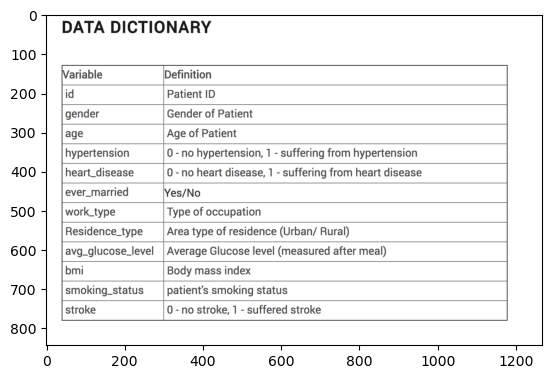

In [4]:
plt.imshow(desc)
plt.show()

In [5]:
sp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
29060,Female,10,0,0,No,children,Urban,58.64,20.4,never smoked,0
29061,Female,56,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
29062,Female,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
29063,Male,40,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
sp.isnull().sum().sum()

0

In [7]:
sp['Residence_type'].nunique()

2

<Axes: xlabel='Residence_type'>

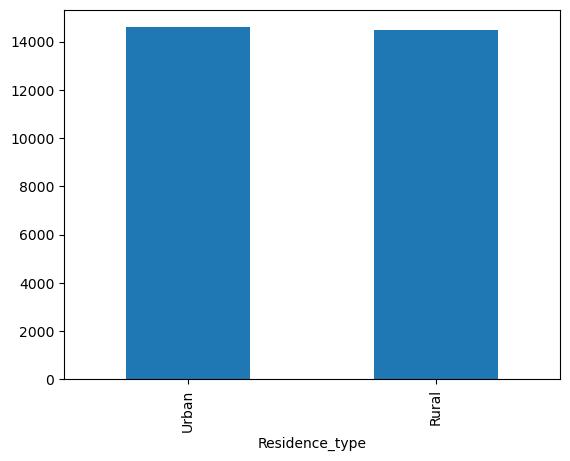

In [8]:
sp['Residence_type'].value_counts().plot(kind='bar')

In [9]:
sp['Residence_type'].value_counts()

Residence_type
Urban    14592
Rural    14473
Name: count, dtype: int64

In [10]:
sp.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: xlabel='stroke', ylabel='count'>

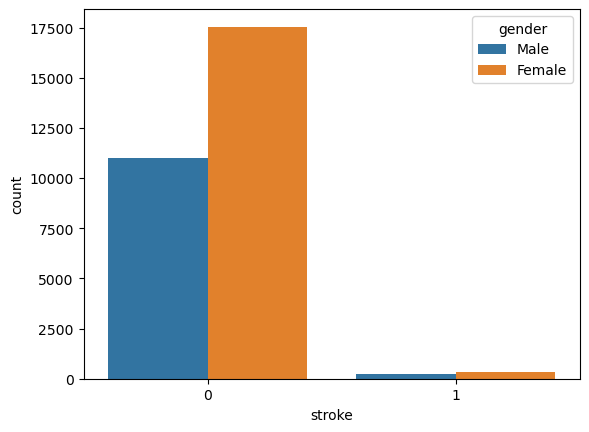

In [11]:
sns.countplot(data=sp, x='stroke', hue='gender')

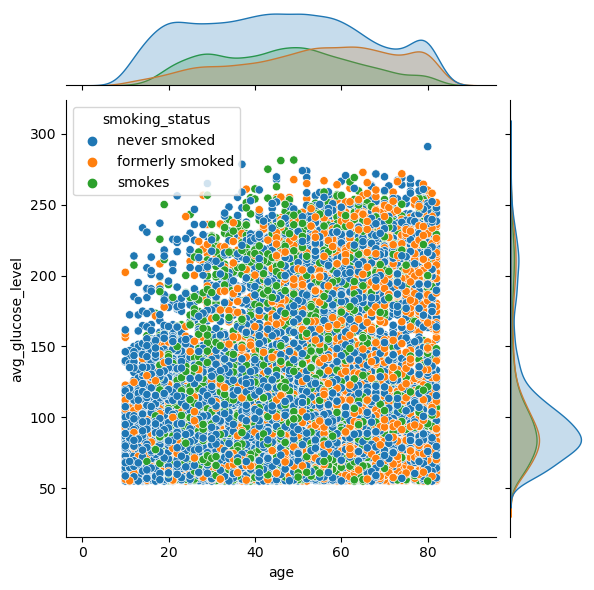

In [12]:
sns.jointplot(data=sp, x='age', y='avg_glucose_level', hue='smoking_status')

<Axes: xlabel='work_type', ylabel='count'>

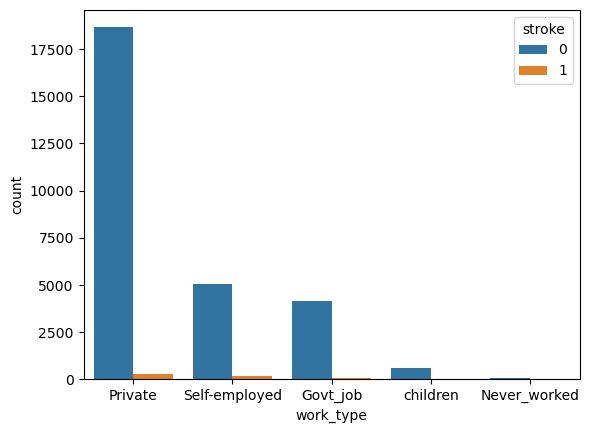

In [13]:
sns.countplot(data=sp, x='work_type', hue='stroke')

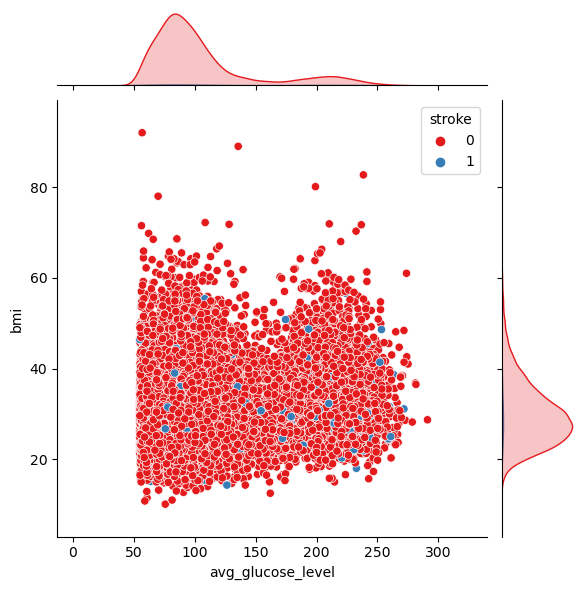

In [14]:
sns.jointplot(data=sp, x='avg_glucose_level', y='bmi', hue='stroke', palette='Set1')

In [15]:
sp_stroke = sp[sp['stroke'] == 1]

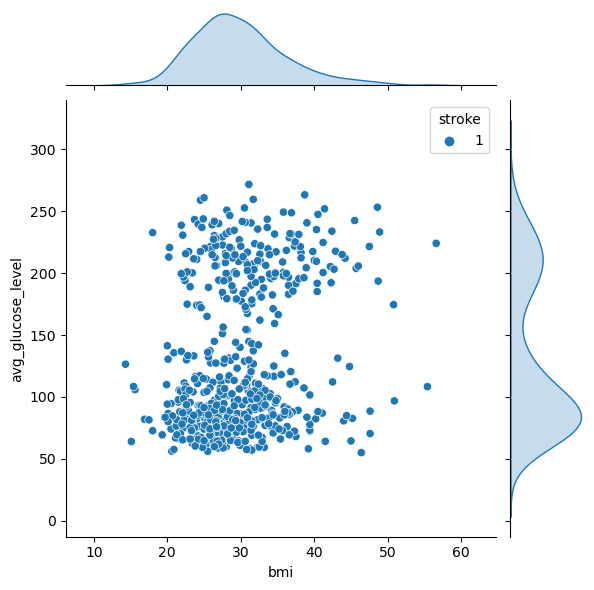

In [16]:
sns.jointplot(data=sp_stroke, y='avg_glucose_level', x='bmi', hue='stroke')

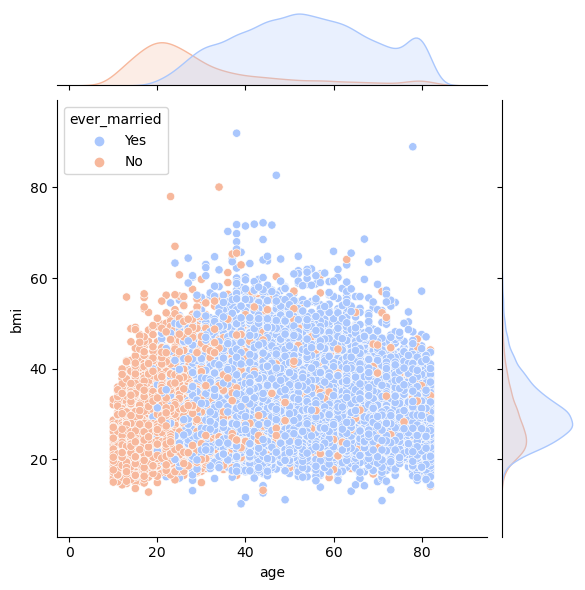

In [17]:
sns.jointplot(data=sp, x='age', y='bmi', hue='ever_married', palette='coolwarm')   

In [18]:
P = sp.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

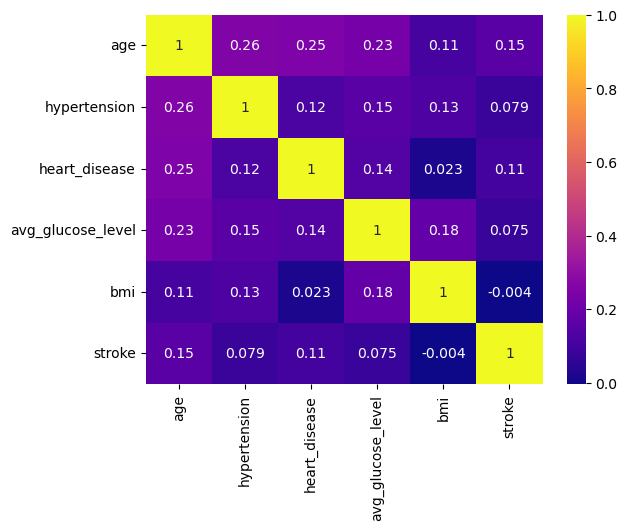

In [19]:
sns.heatmap(sp.corr(numeric_only=True), annot=True, cmap='plasma')
plt.show()

In [20]:
sp.select_dtypes(['object']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [21]:
gen_dummies = pd.get_dummies(sp['gender'], drop_first=True, dtype=int)

In [22]:
gen_dummies

,Male
0,1
1,0
2,0
3,0
4,0
...,...
29060,0
29061,0
29062,0
29063,1


In [23]:
sp = pd.concat([sp,gen_dummies], axis=1)

In [24]:
sp = sp.drop('gender', axis=1)

In [25]:
sp

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
0,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
1,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
2,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,0
3,75,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,0
4,32,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29060,10,0,0,No,children,Urban,58.64,20.4,never smoked,0,0
29061,56,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0
29062,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0
29063,40,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1


In [26]:
m_dummies = pd.get_dummies(sp['ever_married'], drop_first=True, dtype=int)

In [27]:
m_dummies

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
29060,0
29061,1
29062,1
29063,1


In [28]:
sp = pd.concat([m_dummies,sp], axis=1)

In [29]:
sp

,Yes,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
0,1,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
1,1,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
2,1,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,0
3,1,75,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0,0
4,1,32,0,0,Yes,Private,Rural,77.67,32.3,smokes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0,10,0,0,No,children,Urban,58.64,20.4,never smoked,0,0
29061,1,56,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0
29062,1,82,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0
29063,1,40,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1


In [30]:
sp = sp.drop('ever_married', axis=1)

In [31]:
w_dummies = pd.get_dummies(sp['work_type'], drop_first=True, dtype=int)

In [32]:
sp = pd.concat([w_dummies, sp], axis=1)

In [33]:
sp = sp.drop('work_type', axis=1)

In [34]:
sp

,Never_worked,Private,Self-employed,children,Yes,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Male
0,0,1,0,0,1,58,1,0,Urban,87.96,39.2,never smoked,0,1
1,0,1,0,0,1,70,0,0,Rural,69.04,35.9,formerly smoked,0,0
2,0,1,0,0,1,52,0,0,Urban,77.59,17.7,formerly smoked,0,0
3,0,0,1,0,1,75,0,1,Rural,243.53,27.0,never smoked,0,0
4,0,1,0,0,1,32,0,0,Rural,77.67,32.3,smokes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,0,0,0,1,0,10,0,0,Urban,58.64,20.4,never smoked,0,0
29061,0,0,0,0,1,56,0,0,Urban,213.61,55.4,formerly smoked,0,0
29062,0,1,0,0,1,82,1,0,Urban,91.94,28.9,formerly smoked,0,0
29063,0,1,0,0,1,40,0,0,Urban,99.16,33.2,never smoked,0,1


In [35]:
sp.select_dtypes(['object']).columns

Index(['Residence_type', 'smoking_status'], dtype='object')

In [36]:
r_dummies = pd.get_dummies(sp['Residence_type'], drop_first=True, dtype=int)

In [37]:
sp = pd.concat([r_dummies, sp], axis=1)

In [38]:
sp = sp.drop('Residence_type', axis=1)

In [39]:
s_dummies = pd.get_dummies(sp['smoking_status'], drop_first=True, dtype=int)

In [40]:
sp = pd.concat([s_dummies,sp], axis=1)

In [41]:
sp = sp.drop('smoking_status', axis=1)

In [42]:
sp

,never smoked,smokes,Urban,Never_worked,Private,Self-employed,children,Yes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male
0,1,0,1,0,1,0,0,1,58,1,0,87.96,39.2,0,1
1,0,0,0,0,1,0,0,1,70,0,0,69.04,35.9,0,0
2,0,0,1,0,1,0,0,1,52,0,0,77.59,17.7,0,0
3,1,0,0,0,0,1,0,1,75,0,1,243.53,27.0,0,0
4,0,1,0,0,1,0,0,1,32,0,0,77.67,32.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,1,0,1,0,0,0,1,0,10,0,0,58.64,20.4,0,0
29061,0,0,1,0,0,0,0,1,56,0,0,213.61,55.4,0,0
29062,0,0,1,0,1,0,0,1,82,1,0,91.94,28.9,0,0
29063,1,0,1,0,1,0,0,1,40,0,0,99.16,33.2,0,1


In [43]:
X = sp.drop('stroke', axis=1)

In [44]:
X

,never smoked,smokes,Urban,Never_worked,Private,Self-employed,children,Yes,age,hypertension,heart_disease,avg_glucose_level,bmi,Male
0,1,0,1,0,1,0,0,1,58,1,0,87.96,39.2,1
1,0,0,0,0,1,0,0,1,70,0,0,69.04,35.9,0
2,0,0,1,0,1,0,0,1,52,0,0,77.59,17.7,0
3,1,0,0,0,0,1,0,1,75,0,1,243.53,27.0,0
4,0,1,0,0,1,0,0,1,32,0,0,77.67,32.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,1,0,1,0,0,0,1,0,10,0,0,58.64,20.4,0
29061,0,0,1,0,0,0,0,1,56,0,0,213.61,55.4,0
29062,0,0,1,0,1,0,0,1,82,1,0,91.94,28.9,0
29063,1,0,1,0,1,0,0,1,40,0,0,99.16,33.2,1


In [45]:
y = sp['stroke']

In [46]:
y

0        0
1        0
2        0
3        0
4        0
        ..
29060    0
29061    0
29062    0
29063    0
29064    0
Name: stroke, Length: 29065, dtype: int64

In [47]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [48]:
cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)

In [49]:
lr_score = cross_val_score(LogisticRegression(), X, y, cv=cv)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [50]:
lr_score.mean()

0.9813472266594577

In [51]:
rf_score = cross_val_score(RandomForestClassifier(), X, y, cv=cv)

In [52]:
rf_score.mean()

0.9811997739057777

In [53]:
sv_score = cross_val_score(SVC(), X, y, cv=cv)

In [54]:
sv_score.mean()

0.9813472266594577

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [139]:
scaler = MinMaxScaler()

In [140]:
X_trainScaled = scaler.fit_transform(X_train)

In [141]:
X_testScaled = scaler.transform(X_test)

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [143]:
model = Sequential()

model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [134]:


model.fit(x=X_trainScaled, y=y_train, epochs=50, validation_data=(X_testScaled, y_test))

Epoch 1/50
727/727 [==============================] - 3s 3ms/step - loss: 0.5499 - val_loss: 0.4268
Epoch 2/50
727/727 [==============================] - 2s 2ms/step - loss: 0.3498 - val_loss: 0.2811
Epoch 3/50
727/727 [==============================] - 2s 3ms/step - loss: 0.2412 - val_loss: 0.1998
Epoch 4/50
727/727 [==============================] - 2s 3ms/step - loss: 0.1801 - val_loss: 0.1528
Epoch 5/50
727/727 [==============================] - 2s 3ms/step - loss: 0.1446 - val_loss: 0.1247
Epoch 6/50
727/727 [==============================] - 2s 3ms/step - loss: 0.1236 - val_loss: 0.1076
Epoch 7/50
727/727 [==============================] - 2s 2ms/step - loss: 0.1111 - val_loss: 0.0973
Epoch 8/50
727/727 [==============================] - 2s 3ms/step - loss: 0.1038 - val_loss: 0.0911
Epoch 9/50
727/727 [==============================] - 2s 3ms/step - loss: 0.0997 - val_loss: 0.0876
Epoch 10/50
727/727 [==============================] - 2s 2ms/step - loss: 0.0977 - val_loss: 0.0858

In [135]:
losses = pd.DataFrame(model.history.history)

<Axes: >

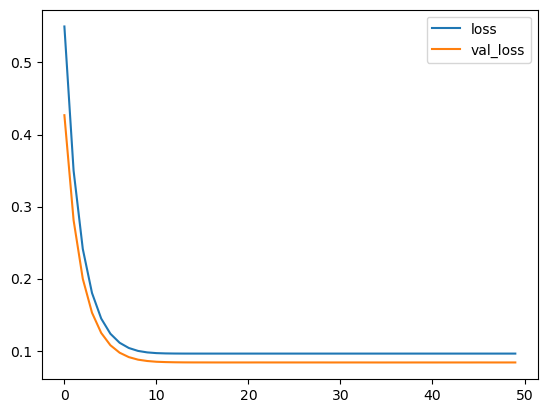

In [136]:
losses.plot()

In [65]:
predictions = model.predict(X_test)

182/182 [==============================] - 0s 2ms/step


In [66]:
pred = np.round(predictions)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5718
           1       0.00      0.00      0.00        95

    accuracy                           0.98      5813
   macro avg       0.49      0.50      0.50      5813
weighted avg       0.97      0.98      0.98      5813



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
confusion_matrix(y_test, pred)

array([[5718,    0],
       [  95,    0]], dtype=int64)

In [144]:
from tensorflow.keras.callbacks import EarlyStopping

In [145]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=1,
                          patience=25)

In [146]:
model.fit(x=X_trainScaled, y=y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
727/727 [==============================] - 3s 3ms/step - loss: 0.5475 - val_loss: 0.4261
Epoch 2/100
727/727 [==============================] - 2s 2ms/step - loss: 0.3490 - val_loss: 0.2803
Epoch 3/100
727/727 [==============================] - 2s 2ms/step - loss: 0.2406 - val_loss: 0.1993
Epoch 4/100
727/727 [==============================] - 2s 2ms/step - loss: 0.1798 - val_loss: 0.1524
Epoch 5/100
727/727 [==============================] - 2s 2ms/step - loss: 0.1445 - val_loss: 0.1246
Epoch 6/100
727/727 [==============================] - 2s 2ms/step - loss: 0.1234 - val_loss: 0.1075
Epoch 7/100
727/727 [==============================] - 2s 2ms/step - loss: 0.1110 - val_loss: 0.0972
Epoch 8/100
727/727 [==============================] - 2s 3ms/step - loss: 0.1037 - val_loss: 0.0911
Epoch 9/100
727/727 [==============================] - 2s 3ms/step - loss: 0.0997 - val_loss: 0.0876
Epoch 10/100
727/727 [==============================] - 2s 2ms/step - loss: 0.0976 - val_lo

In [147]:
lossesI = pd.DataFrame(model.history.history)

<Axes: >

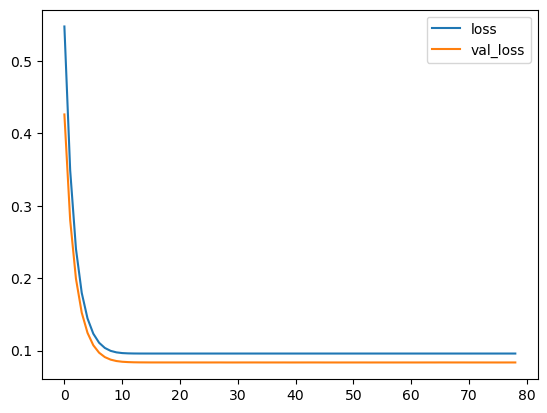

In [148]:
lossesI.plot()